In [2]:
import numpy as np
from keras.applications.inception_v3 import InceptionV3 , preprocess_input
from keras.models import Sequential
from keras.layers import Convolution2D,Dropout,Dense, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras import Model
from keras.optimizers import Adam
from imageio import imread
from skimage.transform import resize

In [3]:
data = np.empty((3000,96,96,3))
for i in range(1499):
  im = imread("/content/drive/MyDrive/Colab Notebooks/yeni/images/yes/y{:01d}.jpg".format(i+1))
  im = preprocess_input(im)
  im = resize(im,output_shape=(96,96,1))
  data[i] = im

for i in range(1499):
  im = imread("/content/drive/MyDrive/Colab Notebooks/yeni/images/no/no{:01d}.jpg".format(i+1))
  im = preprocess_input(im)
  im = resize(im,output_shape=(96,96,1))
  data[i+1500] = im

data.shape

<ipython-input-3-432b23e7e708>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imread("/content/drive/MyDrive/Colab Notebooks/yeni/images/yes/y{:01d}.jpg".format(i+1))
<ipython-input-3-432b23e7e708>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imread("/content/drive/MyDrive/Colab Notebooks/yeni/images/no/no{:01d}.jpg".format(i+1))


(3000, 96, 96, 3)

In [4]:
import numpy as np
labels = np.empty(3000,dtype = int)
labels[:1500] = 1
labels[1500:] = 0
labels.shape

(3000,)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, shuffle =True)


print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(X_train.shape)

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 2400
y_train: 2400
(2400, 96, 96, 3)
X_test: 600
y_test: 600


In [7]:
model = InceptionV3(weights ="imagenet", include_top = False ,pooling='avg',input_shape=(96,96,3))

87910968/87910968 [==============================] - 3s 0us/step


In [8]:
for layer in model.layers :
  layer.trainable = False


In [9]:
last_model = model.output
last_model=Dense(1024,activation="relu")(last_model)
predictions = Dense(2, activation = 'sigmoid')(last_model)
model = Model(inputs = model.input, outputs = predictions)



In [10]:

optimizer = Adam(learning_rate=0.001)

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = optimizer,
    metrics= ["accuracy"]

)

In [11]:
result = model.fit(
    x = X_train,
    y = y_train,
    batch_size=64,
    epochs = 50,
    verbose = 2,
    validation_split = 0.2)

Epoch 1/50
30/30 - 17s - loss: 0.7987 - accuracy: 0.7875 - val_loss: 0.4119 - val_accuracy: 0.8333 - 17s/epoch - 566ms/step
Epoch 2/50
30/30 - 1s - loss: 0.1983 - accuracy: 0.9234 - val_loss: 0.2282 - val_accuracy: 0.8979 - 830ms/epoch - 28ms/step
Epoch 3/50
30/30 - 1s - loss: 0.1103 - accuracy: 0.9641 - val_loss: 0.2555 - val_accuracy: 0.8958 - 848ms/epoch - 28ms/step
Epoch 4/50
30/30 - 1s - loss: 0.0776 - accuracy: 0.9812 - val_loss: 0.1452 - val_accuracy: 0.9583 - 975ms/epoch - 33ms/step
Epoch 5/50
30/30 - 1s - loss: 0.0444 - accuracy: 0.9927 - val_loss: 0.1552 - val_accuracy: 0.9479 - 849ms/epoch - 28ms/step
Epoch 6/50
30/30 - 1s - loss: 0.0384 - accuracy: 0.9917 - val_loss: 0.1111 - val_accuracy: 0.9625 - 976ms/epoch - 33ms/step
Epoch 7/50
30/30 - 1s - loss: 0.0194 - accuracy: 0.9979 - val_loss: 0.1073 - val_accuracy: 0.9688 - 851ms/epoch - 28ms/step
Epoch 8/50
30/30 - 1s - loss: 0.0126 - accuracy: 0.9995 - val_loss: 0.1161 - val_accuracy: 0.9604 - 981ms/epoch - 33ms/step
Epoch 9/

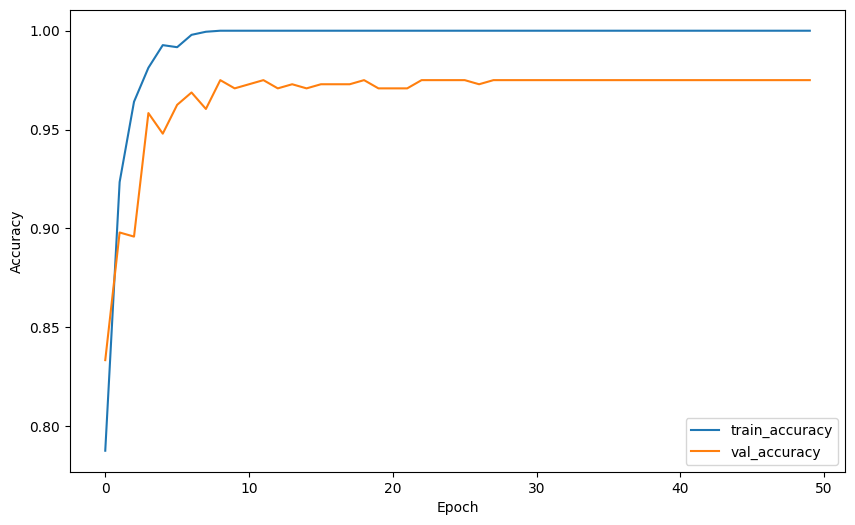

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot the the training loss
plt.plot(result.history["accuracy"], label="train_accuracy")

# Plot the the validation loss
plt.plot(result.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch")


# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/yeni/saved_model_Inception_new')

In [13]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 2s 93ms/step - loss: 0.1210 - accuracy: 0.9717


[0.1210019662976265, 0.971666693687439]

In [14]:
prediction1 = model.predict(X_test)

prediction = np.argmax(prediction1,axis=1)
prediction[:5]

prediction1[:5]

19/19 [==============================] - 2s 28ms/step


array([[9.9840218e-01, 1.3877315e-04],
       [1.8739719e-06, 9.9990118e-01],
       [9.9966431e-01, 5.8000605e-05],
       [1.8657563e-02, 9.7006357e-01],
       [1.2727635e-06, 9.9998212e-01]], dtype=float32)

In [17]:
from sklearn.metrics import classification_report


rapor = classification_report(y_test,prediction, target_names= ["Tümörsüz","Tümörlü"])

print(rapor)

              precision    recall  f1-score   support

    Tümörsüz       0.97      0.98      0.97       313
     Tümörlü       0.98      0.96      0.97       287

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



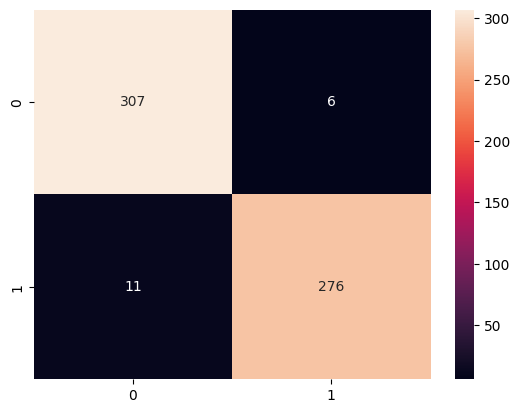

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, prediction)
f = sns.heatmap(cm, annot=True,fmt='d')


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/yeni/saved_model_Inception')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/yeni/saved_model_Inception_new')
